## Making the imports

In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

#For Preprocessing
import re # RegEx for removing non-letter characters
import nltk # natural language processing
nltk.download("stopwords")
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

# For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
GOOGLE_DRIVE_PATH="/content/drive/MyDrive/machine_learning_models_sentiment_analysis"

Mounted at /content/drive


In [ ]:
# Download the data from github
!wget 

In [43]:
# Load Tweet dataset
df0 = pd.read_csv('/content/Bitcoin_tweets.csv', error_bad_lines=False)
df0

<ipython-input-43-cc0fc000c494>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df0 = pd.read_csv('/content/Bitcoin_tweets.csv', error_bad_lines=False)
<ipython-input-43-cc0fc000c494>:2: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv('/content/Bitcoin_tweets.csv', error_bad_lines=False)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362978,"Wilder, Van",Earth Astronaut Base - CAN/USA,Not trying to get likes.\nPeaceful and compass...,2011-02-20 21:04:30,500.0,2841.0,26846.0,False,2021-07-23 13:53:01,@TeamCanada @Olympics @Tokyo2020 @Japan_Olympi...,"['TokyoTogether', 'OlympicGames']",Twitter Web App,False
362979,PorUnMundoMejor,NaN,Si no creyera q un mundo mejor es posible. Nad...,2017-02-01 00:58:45,2357.0,2784.0,102553.0,False,2021-07-23 13:53:01,Imagine there's no countries\nIt isn't hard to...,"['Imaginate', 'OlympicGames', 'Tokyo2020', 'Ch...",Twitter for Android,False
362980,Nitin Narain,"Delhi, India",@ACJIndia Bloomberg Business & Financial Journ...,2009-10-22 14:22:11,1582.0,2176.0,5926.0,False,2021-07-23 13:53:01,Was about to tweet the same thing! Amazing ren...,['OlympicGames'],Twitter for Android,False
362981,जय श्री राम Bultyy Jaglan 🇮🇳🇮🇳,India,"राष्ट्रहित सर्वोपरि, Hypernationalist, \n Prou...",2015-06-26 09:49:16,3156.0,5003.0,22331.0,False,2021-07-23 13:53:00,Jai Ho 🇮🇳\n\nIndia Contingent\n* 228 Members i...,"['Cheer4India', 'OlympicGames', 'OpeningCeremo...",Twitter for Android,False


In [44]:
df=df0[['text']]
df

,text
0,Blue Ridge Bank shares halted by NYSE after #b...
1,"😎 Today, that's this #Thursday, we will do a ""..."
2,"Guys evening, I have read this article about B..."
3,$BTC A big chance in a billion! Price: \487264...
4,This network is secured by 9 508 nodes as of t...
...,...
362978,@TeamCanada @Olympics @Tokyo2020 @Japan_Olympi...
362979,Imagine there's no countries\nIt isn't hard to...
362980,Was about to tweet the same thing! Amazing ren...
362981,Jai Ho 🇮🇳\n\nIndia Contingent\n* 228 Members i...


In [40]:
def tweet_to_words(tweet):
    '''
    Convert tweet text into a sequence of words 
    '''

    # Convert to lowercase
    text = tweet.lower()
    # Remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # Tokenize
    words = text.split()
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # Apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # Return list
    return words

In [46]:
# Extract the words that are the most relevant for the model to learn.
# Eliminate stop words and non english words
# Note: Not all the words will be relevant for the model
cleantext=[]
for item in tqdm(df['text']):
    words=tweet_to_words(item)
    cleantext+=[words]
df['cleantext']=cleantext
df

100%|██████████| 362983/362983 [24:54<00:00, 242.88it/s]
<ipython-input-46-4ee054f2270e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleantext']=cleantext


,text,cleantext
0,Blue Ridge Bank shares halted by NYSE after #b...,"[blue, ridg, bank, share, halt, nyse, bitcoin,..."
1,"😎 Today, that's this #Thursday, we will do a ""...","[today, thursday, take, 2, friend, leowandersl..."
2,"Guys evening, I have read this article about B...","[guy, even, read, articl, btc, would, like, sh..."
3,$BTC A big chance in a billion! Price: \487264...,"[btc, big, chanc, billion, price, 4872644, 0, ..."
4,This network is secured by 9 508 nodes as of t...,"[network, secur, 9, 508, node, today, soon, bi..."
...,...,...
362978,@TeamCanada @Olympics @Tokyo2020 @Japan_Olympi...,"[teamcanada, olymp, tokyo2020, japan, olymp, b..."
362979,Imagine there's no countries\nIt isn't hard to...,"[imagin, countri, hard, noth, kill, die, relig..."
362980,Was about to tweet the same thing! Amazing ren...,"[tweet, thing, amaz, rendit, olympicgam, http,..."
362981,Jai Ho 🇮🇳\n\nIndia Contingent\n* 228 Members i...,"[jai, ho, india, conting, 228, member, incl, 1..."


In [47]:
def unlist(list):
    words=''
    for item in list:
        words+=item+' '
    return words

In [48]:
def compute_vader_scores(df, label):
    sid = SentimentIntensityAnalyzer()
    df["vader_neg"] = df.loc[:, label].apply(lambda x: sid.polarity_scores(unlist(x))["neg"])
    df["vader_neu"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neu"])
    df["vader_pos"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["pos"])
    df["vader_comp"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["compound"])
    df['cleantext2'] = df[label].apply(lambda x: unlist(x))
    return df

In [ ]:
df2 = compute_vader_scores(df,'cleantext')
df2

<ipython-input-48-7409fbee8049>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["vader_neg"] = df.loc[:, label].apply(lambda x: sid.polarity_scores(unlist(x))["neg"])
<ipython-input-48-7409fbee8049>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["vader_neu"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neu"])
<ipython-input-48-7409fbee8049>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

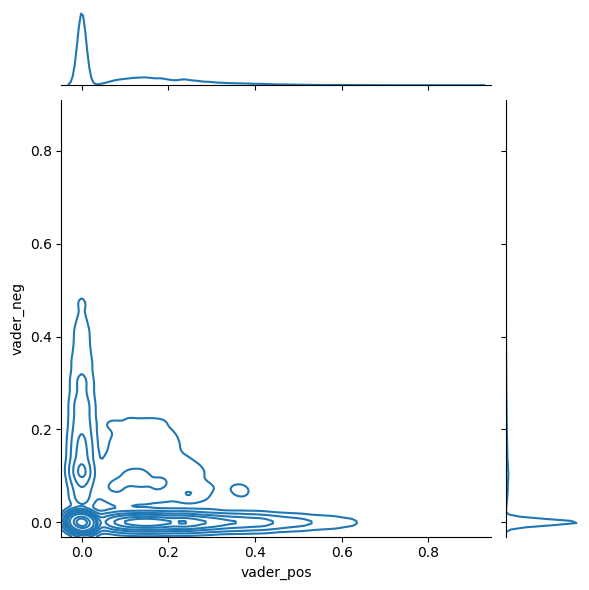

In [65]:
sns.jointplot(data=df2, x='vader_pos', y='vader_neg', kind="kde")

In [ ]:
sns.jointplot(data=df2, x='vader_pos', y='vader_neu', kind="kde")

In [ ]:
class0=[]
for i in range(len(df2)):
    if df2.loc[i,'vader_neg']>0:
        class0+=[0]
    elif df2.loc[i,'vader_pos']>0:
        class0+=[2]        
    else:
        class0+=[1]     

In [ ]:
df['class']=class0
df['class'].value_counts()

# def tokenize_pad_sequences(text):

In [ ]:
MAX_WORDS = 5000
MAX_LEN=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_WORDS, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = tf.keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=MAX_LEN)
    # Return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['cleantext2'][0])
X, tokenizer = tokenize_pad_sequences(df['cleantext2'])
print('After Tokenization & Padding \n', X[0])

In [ ]:
print(X.shape)

In [ ]:
y = pd.get_dummies(df['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

In [70]:
def f1_score(precision, recall):
    '''
    Function to calculate f1 score
    '''
    return 2*(precision*recall)/(precision+recall+tf.keras.backend.epsilon())

In [ ]:
# Create a function to implement a ModelCheckoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="/content/drive/MyDrive/machine_learning_models_sentiment_analysis"):
  return tf.keras.callbacks.ModelCheckpoint(
      filepath=os.path.join(save_path, model_name),
      verbosity=0, # only output a limited amount of text
      save_best_only=True
  )

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from tensorflow.keras import losses

## Hyperparameters

In [ ]:
VOCAB_SIZE = 5000
EMBEDDING_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.1
DECAY_RATE = LEARNING_RATE / EPOCHS
MOMENTUM = 0.8
BATCH_SIZE = 64

# Model

In [ ]:
# Build model
model= tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_SIZE, input_length=MAX_LEN),
    tf.keras.layers.Conv1D(filters=32, kernel_size=1, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
], name="sentiment_analysis_model")

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=LEARNING_RATE, momentum=MOMENTUM, decay=DECAY_RATE, nesterov=False),
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

In [66]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    callbacks=[create_model_checkpoint(model_name=model.name)]
    )

Epoch 1/10
3403/3403 [==============================] - ETA: 0s - loss: 0.2526 - accuracy: 0.9162 - precision: 0.9203 - recall: 0.9105

3403/3403 [==============================] - 164s 48ms/step - loss: 0.2526 - accuracy: 0.9162 - precision: 0.9203 - recall: 0.9105 - val_loss: 0.2009 - val_accuracy: 0.9367 - val_precision: 0.9392 - val_recall: 0.9327
Epoch 2/10
3403/3403 [==============================] - ETA: 0s - loss: 0.1966 - accuracy: 0.9420 - precision: 0.9443 - recall: 0.9386

3403/3403 [==============================] - 169s 50ms/step - loss: 0.1966 - accuracy: 0.9420 - precision: 0.9443 - recall: 0.9386 - val_loss: 0.1627 - val_accuracy: 0.9538 - val_precision: 0.9552 - val_recall: 0.9513
Epoch 3/10
3403/3403 [==============================] - ETA: 0s - loss: 0.1656 - accuracy: 0.9550 - precision: 0.9568 - recall: 0.9529

3403/3403 [==============================] - 178s 52ms/step - loss: 0.1656 - accuracy: 0.9550 - precision: 0.9568 - recall: 0.9529 - val_loss: 0.1443 - val_accuracy: 0.9613 - val_precision: 0.9623 - val_recall: 0.9593
Epoch 4/10
3403/3403 [==============================] - ETA: 0s - loss: 0.1477 - accuracy: 0.9629 - precision: 0.9641 - recall: 0.9611

3403/3403 [==============================] - 170s 50ms/step - loss: 0.1477 - accuracy: 0.9629 - precision: 0.9641 - recall: 0.9611 - val_loss: 0.1316 - val_accuracy: 0.9664 - val_precision: 0.9672 - val_recall: 0.9650
Epoch 5/10
3403/3403 [==============================] - ETA: 0s - loss: 0.1374 - accuracy: 0.9668 - precision: 0.9678 - recall: 0.9655

3403/3403 [==============================] - 178s 52ms/step - loss: 0.1374 - accuracy: 0.9668 - precision: 0.9678 - recall: 0.9655 - val_loss: 0.1242 - val_accuracy: 0.9702 - val_precision: 0.9711 - val_recall: 0.9689
Epoch 6/10
3403/3403 [==============================] - ETA: 0s - loss: 0.1291 - accuracy: 0.9700 - precision: 0.9708 - recall: 0.9689

3403/3403 [==============================] - 169s 50ms/step - loss: 0.1291 - accuracy: 0.9700 - precision: 0.9708 - recall: 0.9689 - val_loss: 0.1199 - val_accuracy: 0.9718 - val_precision: 0.9723 - val_recall: 0.9708
Epoch 7/10
3402/3403 [============================>.] - ETA: 0s - loss: 0.1247 - accuracy: 0.9717 - precision: 0.9725 - recall: 0.9708

3403/3403 [==============================] - 161s 47ms/step - loss: 0.1247 - accuracy: 0.9718 - precision: 0.9725 - recall: 0.9708 - val_loss: 0.1178 - val_accuracy: 0.9730 - val_precision: 0.9733 - val_recall: 0.9723
Epoch 8/10
3403/3403 [==============================] - ETA: 0s - loss: 0.1204 - accuracy: 0.9728 - precision: 0.9735 - recall: 0.9720

3403/3403 [==============================] - 170s 50ms/step - loss: 0.1204 - accuracy: 0.9728 - precision: 0.9735 - recall: 0.9720 - val_loss: 0.1122 - val_accuracy: 0.9747 - val_precision: 0.9753 - val_recall: 0.9740
Epoch 9/10
3402/3403 [============================>.] - ETA: 0s - loss: 0.1171 - accuracy: 0.9742 - precision: 0.9747 - recall: 0.9735

3403/3403 [==============================] - 160s 47ms/step - loss: 0.1171 - accuracy: 0.9742 - precision: 0.9747 - recall: 0.9735 - val_loss: 0.1108 - val_accuracy: 0.9752 - val_precision: 0.9757 - val_recall: 0.9745
Epoch 10/10
3402/3403 [============================>.] - ETA: 0s - loss: 0.1141 - accuracy: 0.9750 - precision: 0.9754 - recall: 0.9741

3403/3403 [==============================] - 171s 50ms/step - loss: 0.1141 - accuracy: 0.9750 - precision: 0.9754 - recall: 0.9741 - val_loss: 0.1096 - val_accuracy: 0.9751 - val_precision: 0.9760 - val_recall: 0.9744


# Evaluate

In [71]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9744
Precision : 0.9750
Recall    : 0.9732
F1 Score  : 0.9741


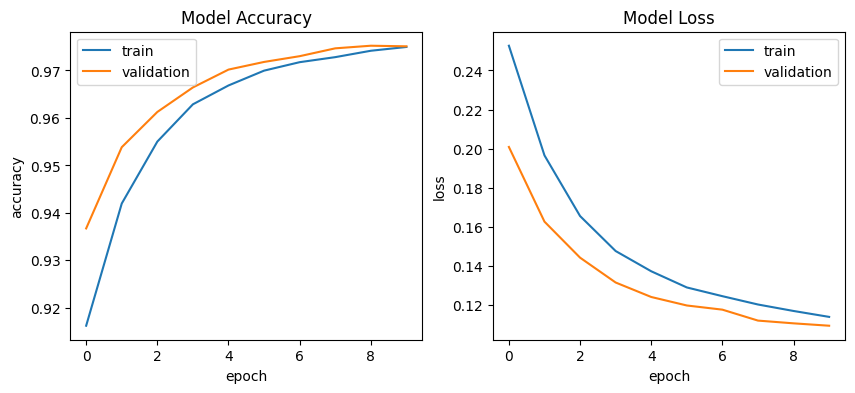

In [72]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

2269/2269 [==============================] - 26s 10ms/step
1    28566
2    27170
0    16861
dtype: int64
1    29178
2    27441
0    15978
dtype: int64


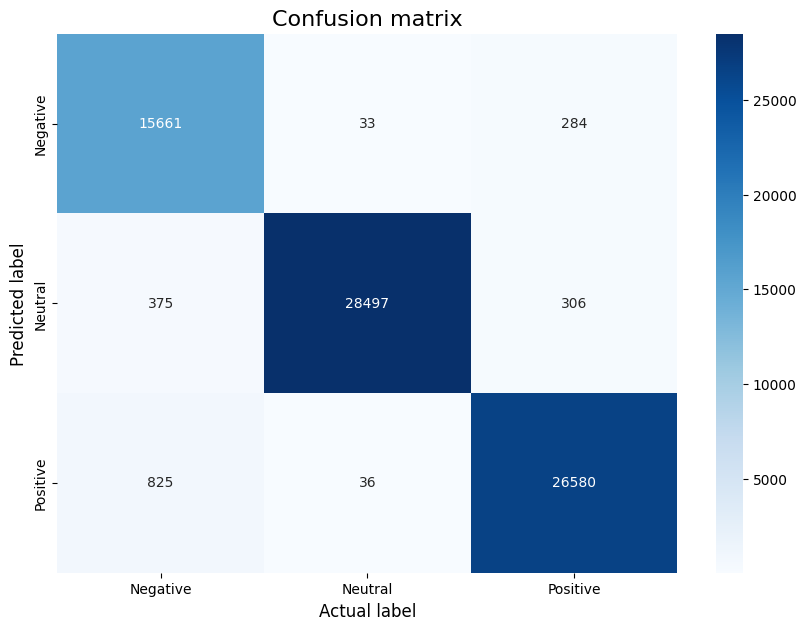

In [73]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''
    Function to plot confusion matrix for the passed model and the data
    '''
    
    sentiment_classes = ['Negative','Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)